In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from subprocess import check_output
from wordcloud import WordCloud, STOPWORDS

In [2]:
file_name = "/Users/yi/Desktop/US_youtube_trending_data.csv"
df = pd.read_csv(file_name,sep=',')
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [3]:
print(df.shape)
print(df.nunique())

(167790, 16)
video_id              30905
title                 31694
publishedAt           30470
channelId              6674
channelTitle           6815
categoryId               15
trending_date           818
tags                  22275
view_count           162659
likes                107110
dislikes              13179
comment_count         30210
thumbnail_link        30905
comments_disabled         2
ratings_disabled          2
description           31612
dtype: int64


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167790 entries, 0 to 167789
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   video_id           167790 non-null  object
 1   title              167790 non-null  object
 2   publishedAt        167790 non-null  object
 3   channelId          167790 non-null  object
 4   channelTitle       167790 non-null  object
 5   categoryId         167790 non-null  int64 
 6   trending_date      167790 non-null  object
 7   tags               167790 non-null  object
 8   view_count         167790 non-null  int64 
 9   likes              167790 non-null  int64 
 10  dislikes           167790 non-null  int64 
 11  comment_count      167790 non-null  int64 
 12  thumbnail_link     167790 non-null  object
 13  comments_disabled  167790 non-null  bool  
 14  ratings_disabled   167790 non-null  bool  
 15  description        163924 non-null  object
dtypes: bool(2), int64(5)

In [5]:
df.head()

,video_id,title,publishedAt,channelId,channelTitle,categoryId,trending_date,tags,view_count,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,description
0,3C66w5Z0ixs,I ASKED HER TO BE MY GIRLFRIEND...,2020-08-11T19:20:14Z,UCvtRTOMP2TqYqu51xNrqAzg,Brawadis,22,2020-08-12T00:00:00Z,brawadis|prank|basketball|skits|ghost|funny vi...,1514614,156908,5855,35313,https://i.ytimg.com/vi/3C66w5Z0ixs/default.jpg,False,False,SUBSCRIBE to BRAWADIS ▶ http://bit.ly/Subscrib...
1,M9Pmf9AB4Mo,Apex Legends | Stories from the Outlands – “Th...,2020-08-11T17:00:10Z,UC0ZV6M2THA81QT9hrVWJG3A,Apex Legends,20,2020-08-12T00:00:00Z,Apex Legends|Apex Legends characters|new Apex ...,2381688,146739,2794,16549,https://i.ytimg.com/vi/M9Pmf9AB4Mo/default.jpg,False,False,"While running her own modding shop, Ramya Pare..."
2,J78aPJ3VyNs,I left youtube for a month and THIS is what ha...,2020-08-11T16:34:06Z,UCYzPXprvl5Y-Sf0g4vX-m6g,jacksepticeye,24,2020-08-12T00:00:00Z,jacksepticeye|funny|funny meme|memes|jacksepti...,2038853,353787,2628,40221,https://i.ytimg.com/vi/J78aPJ3VyNs/default.jpg,False,False,I left youtube for a month and this is what ha...
3,kXLn3HkpjaA,XXL 2020 Freshman Class Revealed - Official An...,2020-08-11T16:38:55Z,UCbg_UMjlHJg_19SZckaKajg,XXL,10,2020-08-12T00:00:00Z,xxl freshman|xxl freshmen|2020 xxl freshman|20...,496771,23251,1856,7647,https://i.ytimg.com/vi/kXLn3HkpjaA/default.jpg,False,False,Subscribe to XXL → http://bit.ly/subscribe-xxl...
4,VIUo6yapDbc,Ultimate DIY Home Movie Theater for The LaBran...,2020-08-11T15:10:05Z,UCDVPcEbVLQgLZX0Rt6jo34A,Mr. Kate,26,2020-08-12T00:00:00Z,The LaBrant Family|DIY|Interior Design|Makeove...,1123889,45802,964,2196,https://i.ytimg.com/vi/VIUo6yapDbc/default.jpg,False,False,Transforming The LaBrant Family's empty white ...


In [6]:
df['log_likes']=np.log(df['likes'])
df['log_view_count']=np.log(df['view_count'])
df['log_dislikes']=np.log(df['dislikes'])
df['log_comment_count']=np.log(df['comment_count'])
df['log_categoryId']=np.log(df['categoryId'])

/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)
/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with si

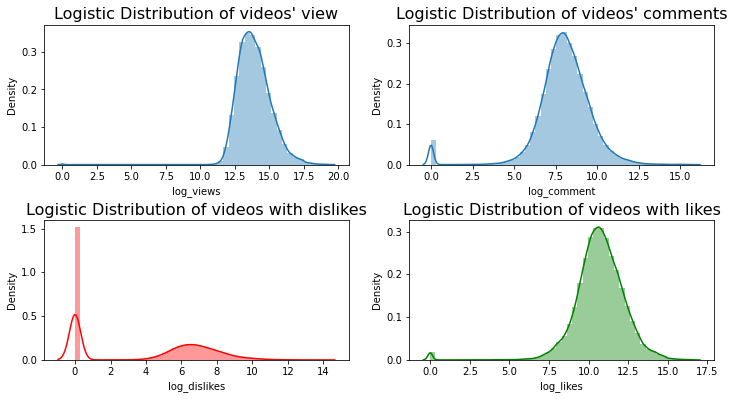

In [7]:
df['log_likes'] = np.log(df['likes'] + 1)
df['log_views'] = np.log(df['view_count'] + 1)
df['log_dislikes'] = np.log(df['dislikes'] + 1)
df['log_comment'] = np.log(df['comment_count'] + 1)

plt.figure(figsize = (12,6))

plt.subplot(221)
g1 = sns.distplot(df['log_views'])
g1.set_title("Logistic Distribution of videos' view", fontsize=16)

plt.subplot(224)
g2 = sns.distplot(df['log_likes'],color='green')
g2.set_title('Logistic Distribution of videos with likes', fontsize=16)

plt.subplot(223)
g3 = sns.distplot(df['log_dislikes'], color='r')
g3.set_title("Logistic Distribution of videos with dislikes", fontsize=16)

plt.subplot(222)
g4 = sns.distplot(df['log_comment'])
g4.set_title("Logistic Distribution of videos' comments", fontsize=16)

plt.subplots_adjust(wspace = 0.2, hspace = 0.4,top = 0.9)

plt.show()

In [8]:
print("Views quantiles")
print(df['view_count'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Likes quantiles")
print(df['likes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Dislikes quantiles")
print(df['dislikes'].quantile([.01,.25,.5,.75,.99]))
print("")
print("Comment quantiles")
print(df['comment_count'].quantile([.01,.25,.5,.75,.99]))

Views quantiles
0.01      136037.78
0.25      486601.50
0.50      993854.00
0.75     2249536.25
0.99    27463252.43
Name: view_count, dtype: float64

Likes quantiles
0.01        890.00
0.25      19426.00
0.50      45194.00
0.75     113365.75
0.99    1584632.57
Name: likes, dtype: float64

Dislikes quantiles
0.01        0.00
0.25        0.00
0.50      242.00
0.75     1096.00
0.99    26349.55
Name: dislikes, dtype: float64

Comment quantiles
0.01         0.00
0.25      1370.00
0.50      3077.00
0.75      7369.00
0.99    121296.18
Name: comment_count, dtype: float64


In [9]:
df['category_name'] = np.nan

df.loc[(df["categoryId"] == 1),"category_name"] = 'Film and Animation'
df.loc[(df["categoryId"] == 2),"category_name"] = 'Cars and Vehicles'
df.loc[(df["categoryId"] == 10),"category_name"] = 'Music'
df.loc[(df["categoryId"] == 15),"category_name"] = 'Pets and Animals'
df.loc[(df["categoryId"] == 17),"category_name"] = 'Sport'
df.loc[(df["categoryId"] == 19),"category_name"] = 'Travel and Events'
df.loc[(df["categoryId"] == 20),"category_name"] = 'Gaming'
df.loc[(df["categoryId"] == 22),"category_name"] = 'People and Blogs'
df.loc[(df["categoryId"] == 23),"category_name"] = 'Comedy'
df.loc[(df["categoryId"] == 24),"category_name"] = 'Entertainment'
df.loc[(df["categoryId"] == 25),"category_name"] = 'News and Politics'
df.loc[(df["categoryId"] == 26),"category_name"] = 'How to and Style'
df.loc[(df["categoryId"] == 27),"category_name"] = 'Education'
df.loc[(df["categoryId"] == 28),"category_name"] = 'Science and Technology'
df.loc[(df["categoryId"] == 29),"category_name"] = 'Non Profits and Activism'
df.loc[(df["categoryId"] == 25),"category_name"] = 'News & Politics'

Category Name count
Entertainment       33457
Gaming              32521
Music               28135
Sport               18047
People and Blogs    14780
Name: category_name, dtype: int64


/Users/yi/Downloads/anaconda3/lib/python3.9/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


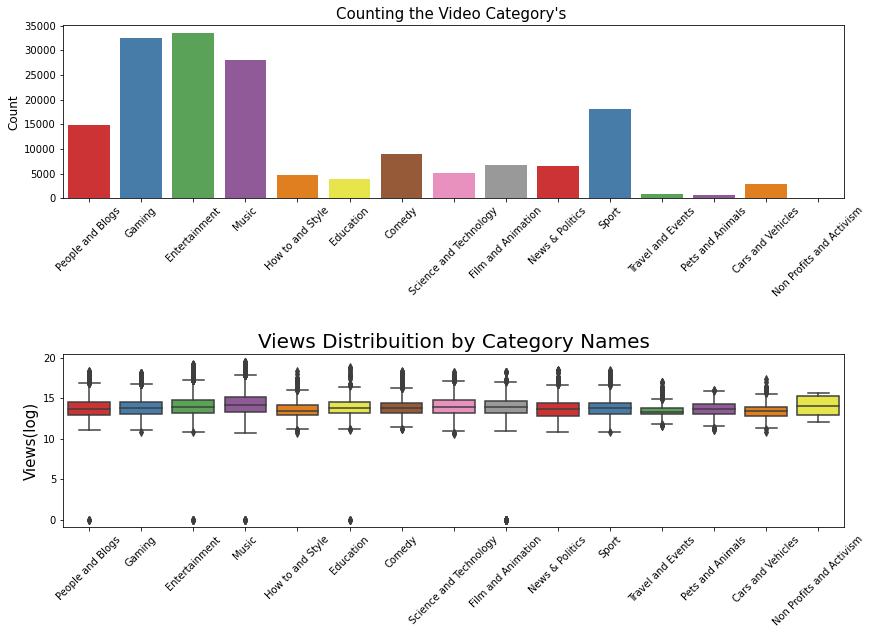

In [10]:
print("Category Name count")
print(df.category_name.value_counts()[:5])

plt.figure(figsize = (14,9))

plt.subplot(211)
g = sns.countplot('category_name', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Counting the Video Category's ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("Count", fontsize=12)

plt.subplot(212)
g1 = sns.boxplot(x='category_name', y='log_views', data=df, palette="Set1")
g1.set_xticklabels(g.get_xticklabels(),rotation=45)
g1.set_title("Views Distribuition by Category Names", fontsize=20)
g1.set_xlabel("", fontsize=15)
g1.set_ylabel("Views(log)", fontsize=15)

plt.subplots_adjust(hspace = 0.9, top = 0.9)

plt.show()

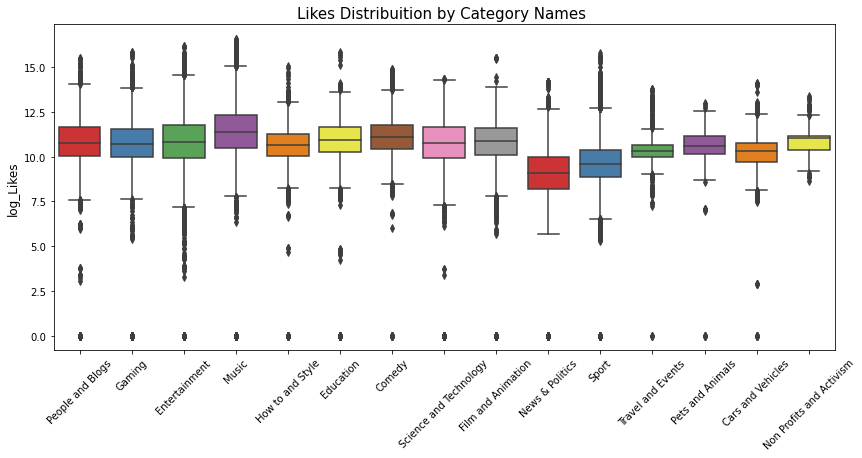

In [11]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='log_likes', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Likes Distribuition by Category Names ", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("log_Likes", fontsize=12)
plt.show()

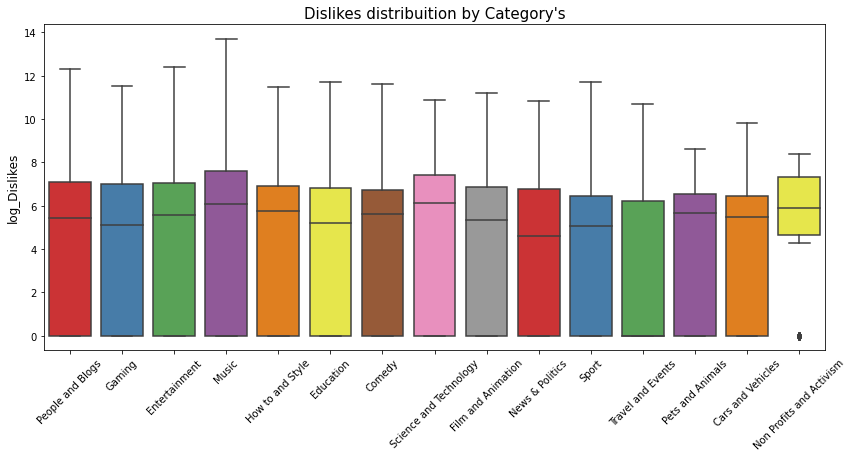

In [13]:
plt.figure(figsize = (14,6))

g = sns.boxplot(x='category_name', y='log_dislikes', data=df, palette="Set1")
g.set_xticklabels(g.get_xticklabels(),rotation=45)
g.set_title("Dislikes distribuition by Category's", fontsize=15)
g.set_xlabel("", fontsize=12)
g.set_ylabel("log_Dislikes", fontsize=12)
plt.show()

In [16]:
df['like_rate'] =  df['likes'] / df['view_count'] * 100
df['dislike_rate'] =  df['dislikes'] / df['view_count'] * 100

In [17]:
import string
import re   
import nltk
from nltk.corpus import stopwords
import spacy
from nltk import pos_tag
from nltk.stem.wordnet import WordNetLemmatizer 
from nltk.tokenize import word_tokenize
from nltk.tokenize import TweetTokenizer 

In [20]:
df['count_word_title']=df["title"].apply(lambda x: len(str(x).split()))
df['count_word_tags']=df["tags"].apply(lambda x: len(str(x).split()))

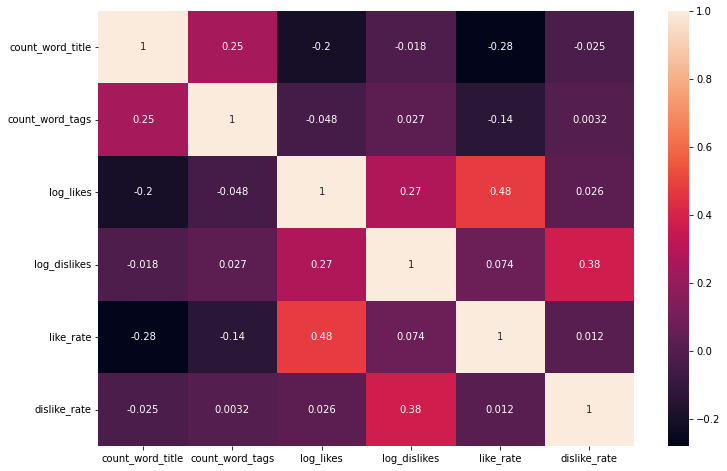

In [22]:
plt.figure(figsize = (12,8))

sns.heatmap(df[['count_word_title','count_word_tags', 'log_likes', 'log_dislikes',
                     'like_rate', 'dislike_rate']].corr(), annot=True)
plt.show()

In [23]:
mpl.rcParams['font.size']= 15              
mpl.rcParams['savefig.dpi']= 100         
mpl.rcParams['figure.subplot.bottom']= .1 

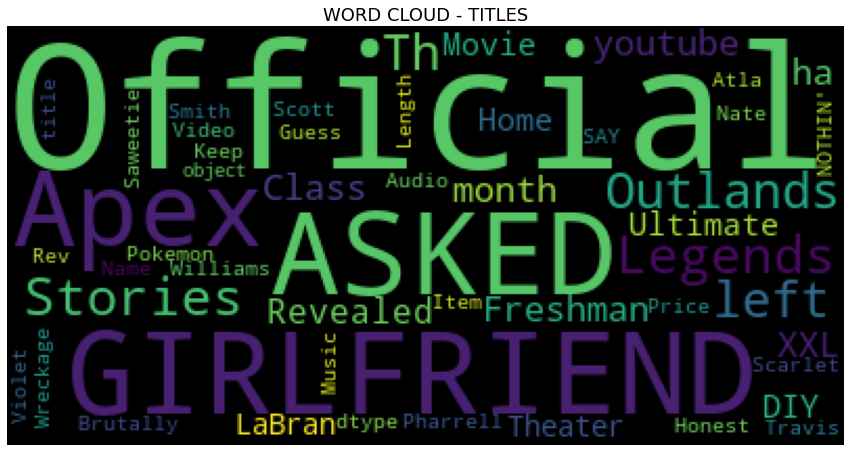

In [24]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)

wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1000,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['title']))

print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TITLES")
plt.axis('off')
plt.show()

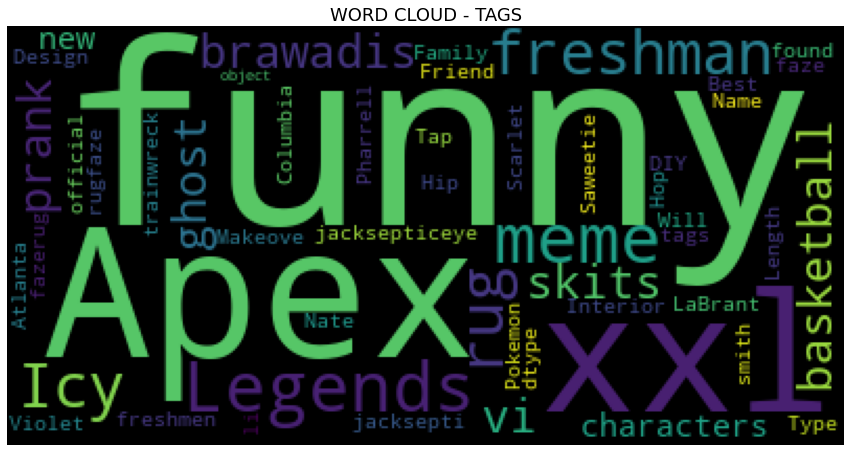

In [26]:
plt.figure(figsize = (15,15))

stopwords = set(STOPWORDS)
wordcloud = WordCloud(
                          background_color='black',
                          stopwords=stopwords,
                          max_words=1200,
                          max_font_size=120, 
                          random_state=42
                         ).generate(str(df['tags']))
print(wordcloud)
fig = plt.figure(1)
plt.imshow(wordcloud)
plt.title("WORD CLOUD - TAGS")
plt.axis('off')
plt.show()